# Profiling and Preparing MTA Bridge and Tunnel Toll Data 

A measure of vehicle activity would be useful for analyzing how collisions vary with increased / decreased driving. The Metropolitan Transit Authority publishes vehicle counts passing through several tolling locations in the New York City area that could serve as a measure of overall driving activity.


### Key Questions
- What fields are there and are they useful? 
- Are there significant gaps in the data over time?
- Does bridge and tunnel toll activity reasonably represent driving activity in New York City?


### Data Sources
- Data obtained from https://data.ny.gov/Transportation/Hourly-Traffic-on-Metropolitan-Transportation-Auth/qzve-kjga/about_data

In [1]:
from datetime import datetime
import os.path

import folium
import matplotlib.pyplot as plt
import pandas as pd
import pandahelper.reports as ph

import src.utils
import src.visualizations as viz
from src.constants import DAY_OF_WEEK_MAP, MONTHS_MAP
from src.strings import add_line_breaks

## Parameters

In [2]:
DATA_LOC = "data/raw/Hourly_Traffic_MTA.csv"
PLAZA_MAPPING_LOC = "data/Plaza ID Mapping.csv"
IMG_DIR = "output"
PROCESSED_DATA_LOC = "data/processed/traffic_index.pkl"
ANALYSIS_START_DATE = datetime(year=2010, month=1, day=1)
ANALYSIS_END_DATE = datetime(year=2024, month=1, day=1)
MILLION = 1000000
THOUSAND = 1000

## Overview of DataFrame

In [3]:
data = pd.read_csv(DATA_LOC)
data.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,05/30/2024,0,I,2021,413
1,21,05/30/2024,1,I,1187,281
2,21,05/30/2024,2,I,880,218
3,21,05/30/2024,3,I,852,203
4,21,05/30/2024,4,I,1698,321


In [4]:
ph.DataFrameProfile(data)

DataFrame-Level Info
----------------------  ------------
DF Shape                (2216975, 6)
Duplicated Rows         0

Series Name           Data Type
--------------------  -----------
Plaza ID              int64
Date                  object
Hour                  int64
Direction             object
# Vehicles - E-ZPass  int64
# Vehicles - VToll    int64

Summary of Nulls Per Row
--------------------------  -----------
count                       2.21698e+06
min                         0
1%                          0
5%                          0
25%                         0
50%                         0
75%                         0
95%                         0
99%                         0
max                         0
median                      0
mean                        0
median absolute deviation   0
standard deviation          0
skew                        0


## Examining individual fields (columns)

In [5]:
plaza_id_report = ph.SeriesProfile(data["Plaza ID"])
plaza_id_report

Plaza ID Info
---------------  -------
Data Type        int64
Count            2216975
Unique Values    20
Null Values      0

  Value    Count  % of total
-------  -------  ------------
      3   135216  6.10%
      9   135216  6.10%
      2   130560  5.89%
      1   130560  5.89%
      6   128352  5.79%
      5   128352  5.79%
      7   123072  5.55%
      8   122784  5.54%
      4   120624  5.44%
     27   113694  5.13%
     28   113689  5.13%
     24   113668  5.13%
     26   113642  5.13%
     25   113397  5.11%
     29   112634  5.08%
     23   112561  5.08%
     30    86877  3.92%
     11    65832  2.97%
     21    59441  2.68%
     22    56804  2.56%

Statistic                         Value
-------------------------  ------------
count                       2.21698e+06
min                         1
1%                          1
5%                          1
25%                         5
50%                         9
75%                        25
95%                        29
99

In [6]:
date_report = ph.SeriesProfile(data["Date"])
date_report

Date Info
-------------  -------
Data Type      object
Count          2216975
Unique Values  5166
Null Values    0

Value         Count  % of total
----------  -------  ------------
01/01/2010      456  0.02%
08/08/2014      456  0.02%
08/01/2014      456  0.02%
08/02/2014      456  0.02%
08/03/2014      456  0.02%
08/04/2014      456  0.02%
08/05/2014      456  0.02%
08/06/2014      456  0.02%
08/07/2014      456  0.02%
08/09/2014      456  0.02%
07/30/2014      456  0.02%
08/10/2014      456  0.02%
08/11/2014      456  0.02%
08/12/2014      456  0.02%
08/13/2014      456  0.02%
08/14/2014      456  0.02%
08/15/2014      456  0.02%
08/16/2014      456  0.02%
07/31/2014      456  0.02%
07/29/2014      456  0.02%
07/29/2017       96  0.00%
07/30/2017       96  0.00%
07/31/2017       96  0.00%
07/12/2017       96  0.00%
09/30/2016       48  0.00%




In [7]:
hour_report = ph.SeriesProfile(data["Hour"])
hour_report

Hour Info
-------------  -------
Data Type      int64
Count          2216975
Unique Values  24
Null Values    0

  Value    Count  % of total
-------  -------  ------------
      6    92399  4.17%
     15    92399  4.17%
     14    92399  4.17%
      7    92398  4.17%
      8    92398  4.17%
     12    92397  4.17%
     13    92397  4.17%
     16    92397  4.17%
      4    92396  4.17%
     11    92396  4.17%
     17    92395  4.17%
      5    92395  4.17%
     10    92395  4.17%
      9    92391  4.17%
     18    92391  4.17%
     19    92389  4.17%
     20    92388  4.17%
     21    92376  4.17%
     22    92376  4.17%
     23    92374  4.17%
      0    92338  4.17%
      3    92320  4.16%
      1    92297  4.16%
      2    92174  4.16%

Statistic                         Value
-------------------------  ------------
count                       2.21698e+06
min                         0
1%                          0
5%                          1
25%                         6
50%       

In [8]:
hour_report = ph.SeriesProfile(data["Direction"])
hour_report

Direction Info
----------------  -------
Data Type         object
Count             2216975
Unique Values     2
Null Values       0

Value      Count  % of total
-------  -------  ------------
I        1126660  50.82%
O        1090315  49.18%




In [9]:
ez_report = ph.SeriesProfile(data["# Vehicles - E-ZPass"])
ez_report

# Vehicles - E-ZPass Info
---------------------------  -------
Data Type                    int64
Count                        2216975
Unique Values                9594
Null Values                  0

  Value    Count  % of total
-------  -------  ------------
      0     3569  0.16%
     44     2603  0.12%
     43     2588  0.12%
     42     2559  0.12%
     40     2535  0.11%
     36     2531  0.11%
     39     2518  0.11%
     37     2515  0.11%
     41     2512  0.11%
     45     2485  0.11%
     46     2480  0.11%
     38     2477  0.11%
     48     2414  0.11%
     34     2397  0.11%
     35     2372  0.11%
     50     2354  0.11%
     47     2353  0.11%
     51     2349  0.11%
     32     2295  0.10%
     52     2289  0.10%
   9088        1  0.00%
   9069        1  0.00%
  10004        1  0.00%
   9734        1  0.00%
   9177        1  0.00%

Statistic                            Value
-------------------------  ---------------
count                          2.21698e+06
min      

In [10]:
vtoll_report = ph.SeriesProfile(data["# Vehicles - VToll"])
vtoll_report

# Vehicles - VToll Info
-------------------------  -------
Data Type                  int64
Count                      2216975
Unique Values              1831
Null Values                0

  Value    Count  % of total
-------  -------  ------------
     10    10038  0.45%
     11     9995  0.45%
      9     9964  0.45%
     12     9839  0.44%
      8     9810  0.44%
     13     9614  0.43%
      7     9534  0.43%
     14     9438  0.43%
     15     9250  0.42%
     16     8808  0.40%
     17     8680  0.39%
      6     8382  0.38%
     18     8377  0.38%
     19     8366  0.38%
     20     8133  0.37%
     21     7892  0.36%
     53     7889  0.36%
     56     7884  0.36%
     52     7861  0.35%
     57     7832  0.35%
   1740        1  0.00%
   1739        1  0.00%
   1897        1  0.00%
   1734        1  0.00%
   1742        1  0.00%

Statistic                           Value
-------------------------  --------------
count                         2.21698e+06
min                     

## Creating additional fields for analysis

I manually created a mapping between Plaza ID and the name of the bridge or tunnel (including lat-long) using the MTA data dictionary.

### Location

In [11]:
plaza_location_info = pd.read_csv(PLAZA_MAPPING_LOC)
plaza_location_info

,Plaza ID,Bridge / Tunnel,Latitude,Longitude
0,21,Robert F. Kennedy Bridge,40.779648,-73.926771
1,22,Robert F. Kennedy Bridge,40.779648,-73.926771
2,23,Bronx-Whitestone Bridge (BWB),40.801405,-73.829348
3,24,Henry Hudson Bridge (HHB),40.877645,-73.922386
4,25,Marine Parkway-Gil Hodges Memorial Bridge (MPB),40.573195,-73.884734
5,26,Cross Bay Veterans Memorial Bridge (CBB),40.597142,-73.820928
6,27,Queens Midtown Tunnel (QMT),40.745490,-73.964421
7,28,Hugh L. Carey Tunnel (HCT),40.694049,-74.012872
8,29,Throgs Neck Bridge (TNB),40.799901,-73.793407
9,30,Verrazzano-Narrows Bridge (VNB),40.606461,-74.045057


In [12]:
plaza_bridge_map = dict(
    zip(plaza_location_info["Plaza ID"], plaza_location_info["Bridge / Tunnel"])
)
data["Location"] = data["Plaza ID"].map(plaza_bridge_map)

### Datetime

In [13]:
data["date hour"] = data["Date"] + " " + data["Hour"].astype(dtype="str")
data["datetime"] = pd.to_datetime(data["date hour"], format="%m/%d/%Y %H")
data = data.drop(["date hour"], axis=1)

### Sum of Vehicles

In [14]:
data["Sum Vehicles"] = data["# Vehicles - E-ZPass"] + data["# Vehicles - VToll"]

## Assessing Completeness of Data

#### Observations per day

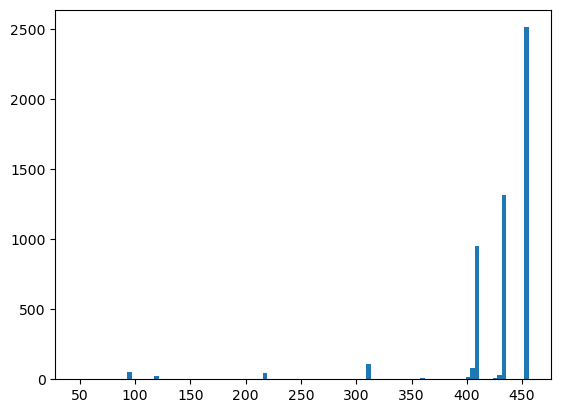

In [15]:
date_histogram = plt.hist(data["Date"].value_counts(), bins=100)

In [16]:
data["Date"].value_counts().unique()

array([456, 432, 431, 430, 429, 428, 427, 426, 425, 422, 418, 414, 408,
       407, 406, 405, 404, 403, 402, 401, 400, 398, 396, 391, 384, 383,
       360, 312, 216, 120,  96,  48])

In [17]:
sum(data["Date"].value_counts() < 312)

123

#### Periods of time with missing observations

In [18]:
dts = pd.DataFrame(data["datetime"].sort_values())
dts["TimeDelta"] = dts["datetime"].diff()  # shows difference from previous row

In [19]:
dts["TimeDelta"].value_counts().sort_values()

TimeDelta
28 days 01:00:00          1
14 days 01:00:00          1
8 days 01:00:00           1
2 days 01:00:00           3
7 days 01:00:00           4
0 days 02:00:00           7
1 days 01:00:00          14
0 days 01:00:00      123945
0 days 00:00:00     2092998
Name: count, dtype: int64

In [20]:
dts[dts["TimeDelta"] > pd.Timedelta(hours=1)].sort_values(
    by="TimeDelta", ascending=False
)

,datetime,TimeDelta
989784,2017-10-22 00:00:00,28 days 01:00:00
986654,2017-11-12 00:00:00,14 days 01:00:00
265819,2022-09-18 00:00:00,8 days 01:00:00
859131,2018-10-07 00:00:00,7 days 01:00:00
975536,2017-12-17 00:00:00,7 days 01:00:00
879651,2018-08-12 00:00:00,7 days 01:00:00
283531,2022-07-31 00:00:00,7 days 01:00:00
999671,2017-08-20 00:00:00,2 days 01:00:00
1000151,2017-08-13 00:00:00,2 days 01:00:00
757526,2019-06-16 00:00:00,2 days 01:00:00


In [21]:
dates = pd.Series(data["Date"])
dates.index = data["datetime"]
# resampling creates observations for periods of time that were missing from dataset (that have a count of 0)
obs_per_day = dates.resample("D").count()
days_missing_observations = obs_per_day[obs_per_day == 0]
len(days_missing_observations)

98

In [22]:
days_missing_observations.groupby(
    by=days_missing_observations.index.year
).count().sort_values(ascending=False)

datetime
2017    53
2022    17
2018    15
2019     4
2023     4
2021     3
2012     1
2024     1
Name: Date, dtype: int64

Of the 5000+ days in the data set:
- There \~120 days  where there are more than 0 but less than 312 observations per day. 
- There are \~100 days (~2% of days) where there are 0 observations
- More than half of the missing days are in 2017 where there are gaps of up to 28 days

__It appears that the data set has some gaps, notably in 2017.__

#### Observations per Toll Plaza per Day

In [23]:
hour_groupby = data.groupby(["Date", "Plaza ID", "Direction"])["Hour"].count()
ph.frequency_table(hour_groupby)

,Count,% of Total
24,92060,99.63%
23,195,0.21%
21,57,0.06%
22,56,0.06%
20,16,0.02%
19,9,0.01%
18,4,0.00%
17,2,0.00%
12,2,0.00%


In [24]:
obs_per_day.groupby(by=obs_per_day.index.year).mean()

datetime
2010    456.000000
2011    455.868493
2012    454.754098
2013    456.000000
2014    456.000000
2015    456.000000
2016    449.377049
2017    231.235616
2018    397.306849
2019    403.202740
2020    409.956284
2021    428.265753
2022    411.808219
2023    427.153425
2024    428.754967
Name: Date, dtype: float64

When there are observations for a toll plaza, there tends to be 24 per day per direction. Changing plaza IDs as explained in the linked document may explain some of the discrepancies. Variations in the mean number of observations per day is likely explained by the gaps identified in dataset.

https://data.ny.gov/api/views/qzve-kjga/files/1c0dd3e2-035c-4f0f-872e-f29171694e09?download=true&filename=MTA_HourlyTrafficBridgeTunnel_DataDictionary.pdf

## Is the dataset useful for creating overall measure of traffic?

Does bridge and tunnel toll activity reasonably represent driving activity in New York City?

In [25]:
map_center = (40.69, -73.92)
locations = set(
    zip(
        plaza_location_info["Latitude"],
        plaza_location_info["Longitude"],
        plaza_location_info["Bridge / Tunnel"],
    )
)
map_nyc = folium.Map(
    location=map_center, zoom_start=10, tiles="OpenStreetMap", width=600, height=600
)
for loc in locations:
    folium.Marker((loc[0], loc[1]), popup=loc[2], tooltip=loc[2]).add_to(map_nyc)
map_nyc

The bridges are tunnels are distributed through the city and do not exclusively focus on access to a central business district. All five boroughs (counties) are connected through these bridges/tunnels. 

### Vehicle Counts by Location

In [26]:
crossings_by_location = (
    data.groupby(by=data["Location"])["Sum Vehicles"].sum().sort_values(ascending=False)
)
crossings_millions = [round(x / MILLION) for x in crossings_by_location.values]

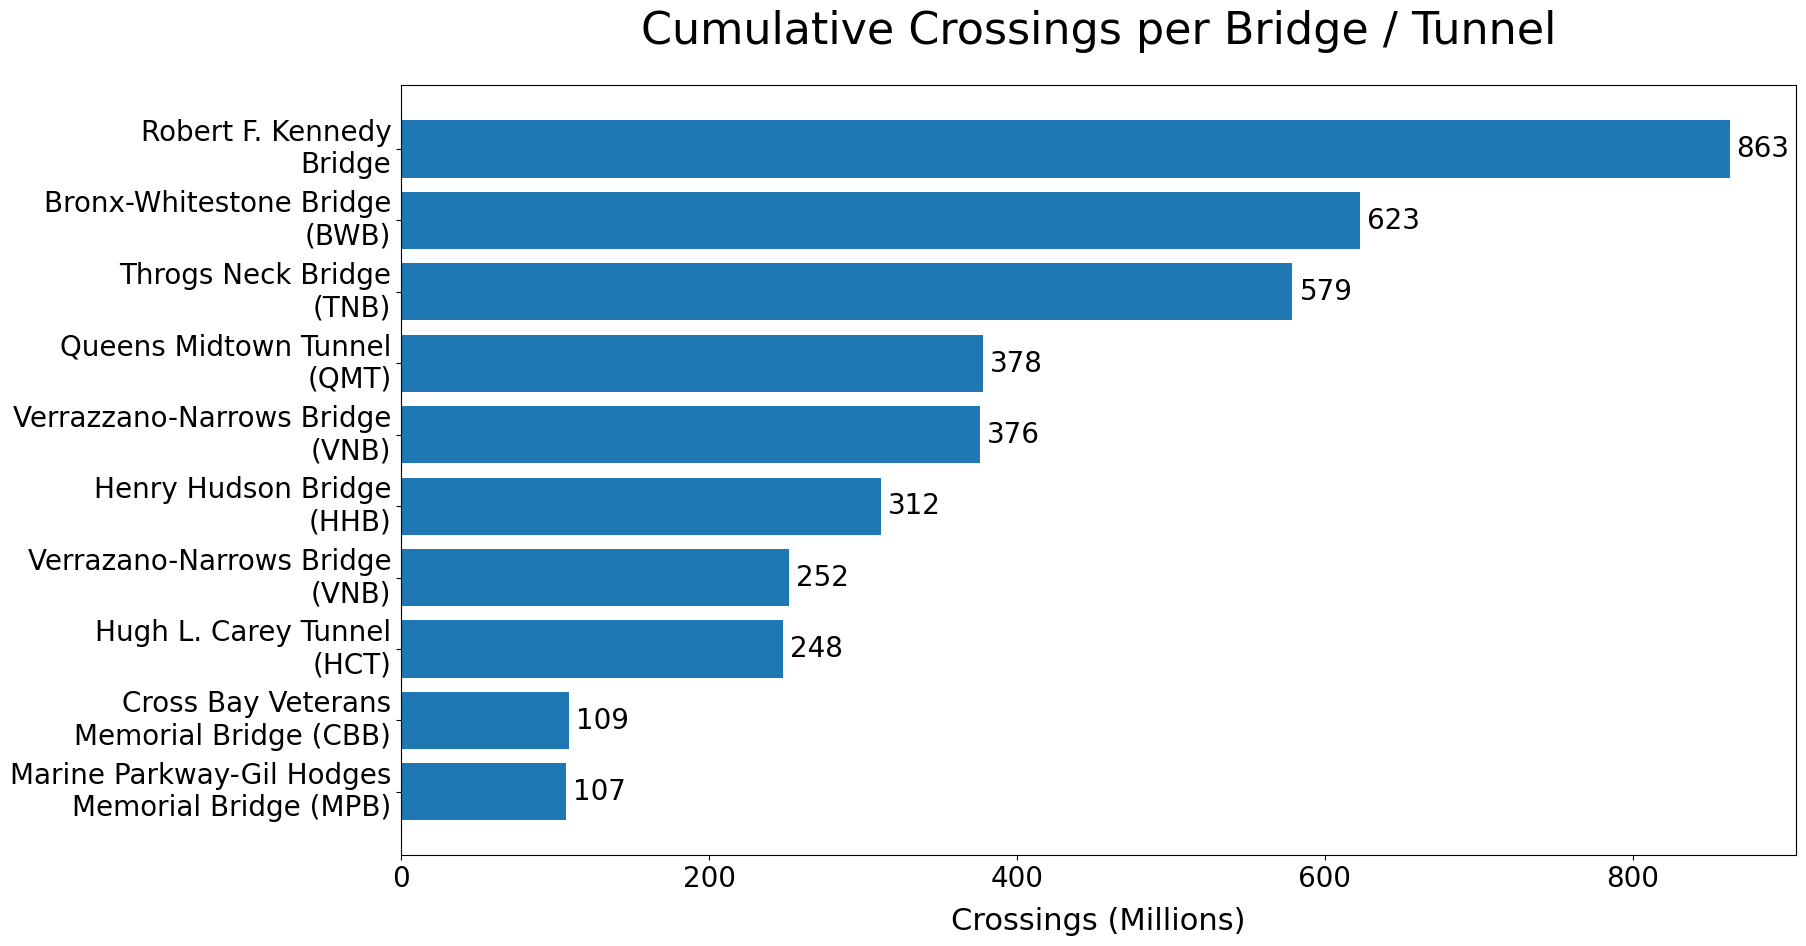

In [27]:
title = "Cumulative Crossings per Bridge / Tunnel"
x_label = "Crossings (Millions)"
bar_lables = add_line_breaks(crossings_by_location.index)
viz.make_horizontal_bar_chart(
    bar_lables,
    crossings_millions,
    title=title,
    x_label=x_label,
    reverse=True,
    save=os.path.join(IMG_DIR, "mta", "cumulative_crossings.png"),
)

It seems reasonable that the RFK (Triborough) bridge and Verrazzano bridge would have significantly more traffic than the Cross Bay and Marine Parkway bridges

### Annual Vehicle Crossings

Selecting date range

In [28]:
bt_data_clean = data[
    data["datetime"].between(ANALYSIS_START_DATE, ANALYSIS_END_DATE, inclusive="left")
]

In [29]:
bt_data_clean["datetime"].min(), bt_data_clean["datetime"].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2023-12-31 23:00:00'))

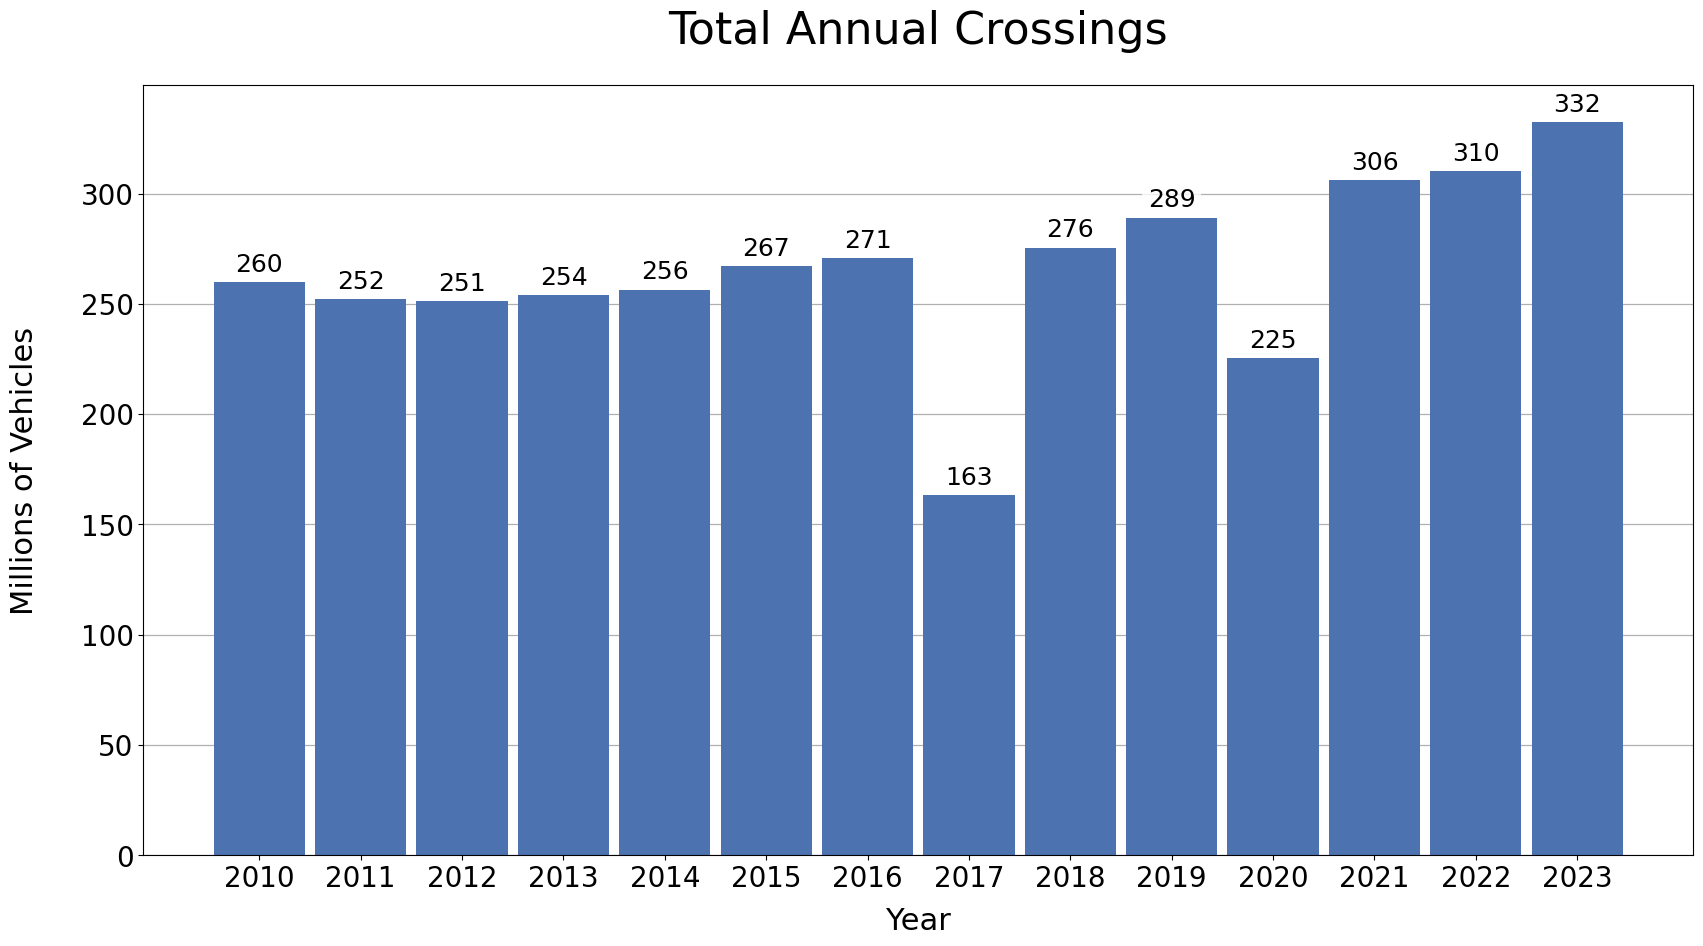

In [30]:
annual_crossings = pd.DataFrame(
    bt_data_clean.groupby(by=bt_data_clean["datetime"].dt.year)["Sum Vehicles"].sum()
    / MILLION
)
year_labels = {
    "title": "Total Annual Crossings",
    "y_label": "Millions of Vehicles",
    "x_label": "Year",
}
viz.make_grouped_bar_chart(
    annual_crossings,
    **year_labels,
    legend=False,
    ylabel_rotation="vertical",
    fig_size=(20, 10),
    bar_fontsize=18,
    bar_padding=4,
    colors=viz.CYCLE_COLORS,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "total_annual_crossings.png"),
)

__2017 numbers are clearly questionable and will be excluded from the following analyses of monthly and weekly patterns__

In [31]:
exclude_2017 = bt_data_clean[bt_data_clean["datetime"].dt.year != 2017]

Calculating time-related values for scaling values

In [32]:
time_range = (
    bt_data_clean["datetime"].max() - bt_data_clean["datetime"].min()
)  # Pandas Timedelta object
total_days = (
    time_range.round("1d").days - 365
)  # removing one year to reflect exclusion of 2017
total_years = round(total_days / 365.25)
total_weeks = total_days / 7

### Monthly Variation
- Crossings are higher in summer months and lower in January / February

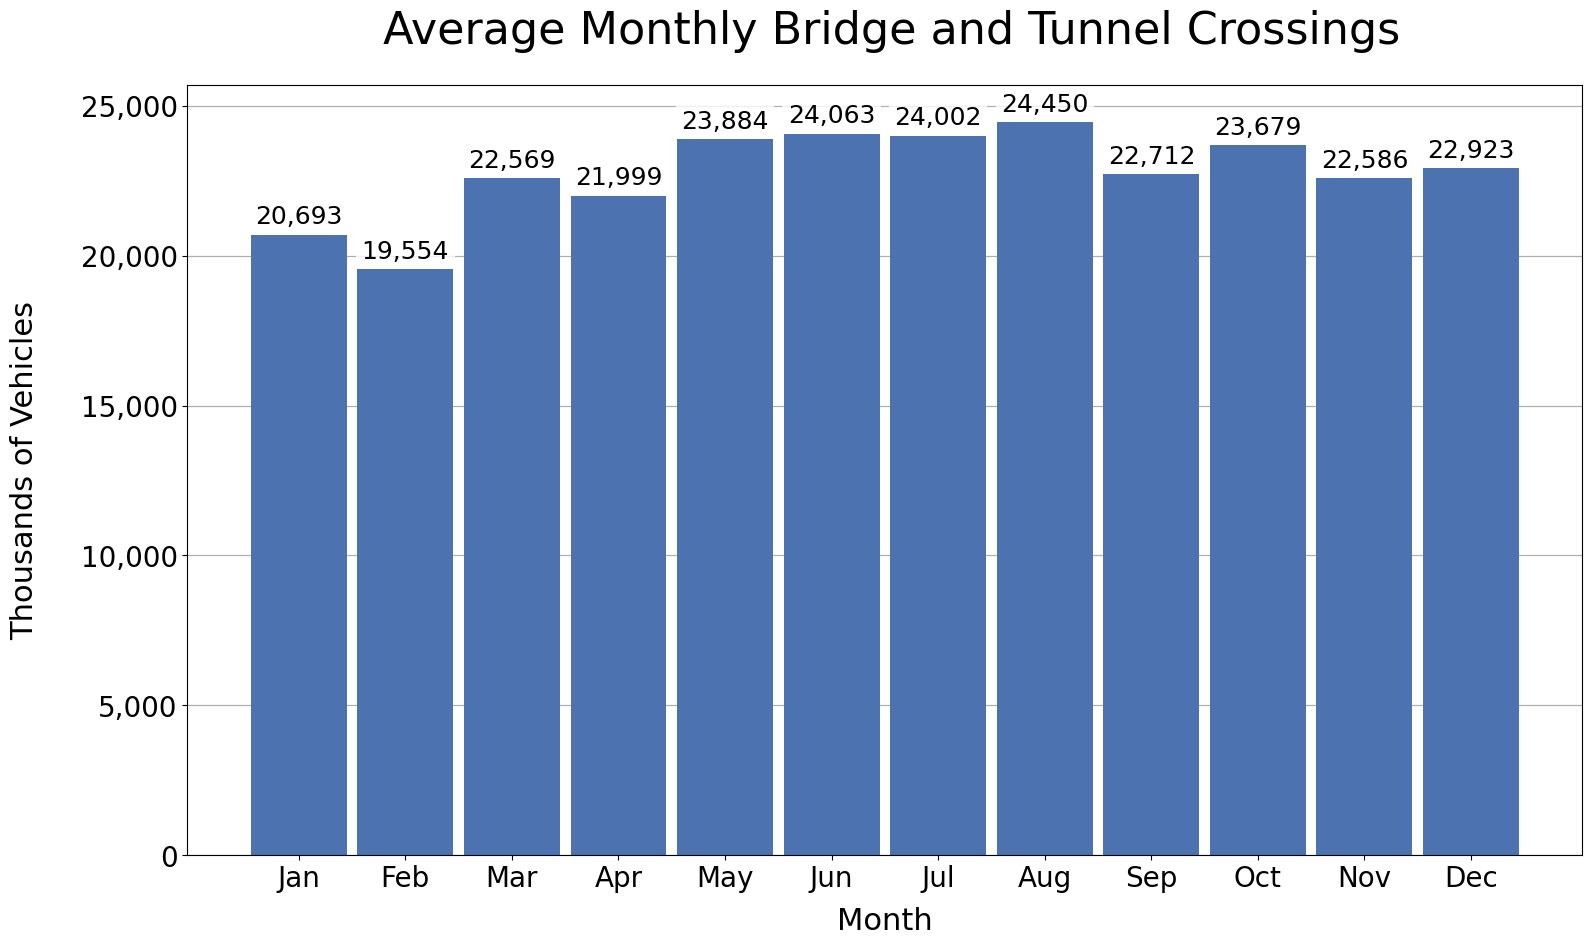

In [33]:
scale_factor = THOUSAND * total_years
monthly_crossings = pd.DataFrame(
    exclude_2017.groupby(by=exclude_2017["datetime"].dt.month)["Sum Vehicles"].sum()
    / scale_factor
)
monthly_crossings.index = monthly_crossings.index.map(MONTHS_MAP)
month_labels = {
    "title": " Average Monthly Bridge and Tunnel Crossings",
    "y_label": "Thousands of Vehicles",
    "x_label": "Month",
}
viz.make_grouped_bar_chart(
    monthly_crossings,
    **month_labels,
    legend=False,
    ylabel_rotation="vertical",
    bar_fontsize=18,
    bar_padding=4,
    colors=viz.CYCLE_COLORS,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "monthly_crossings.png"),
)

### Weekly Variation

- Crossings increase from Sunday to Friday.
- Cumulative traffic levels drop during the weekends, but not dramatically suggesting that the data does not over-index on rush-hour commuters.  

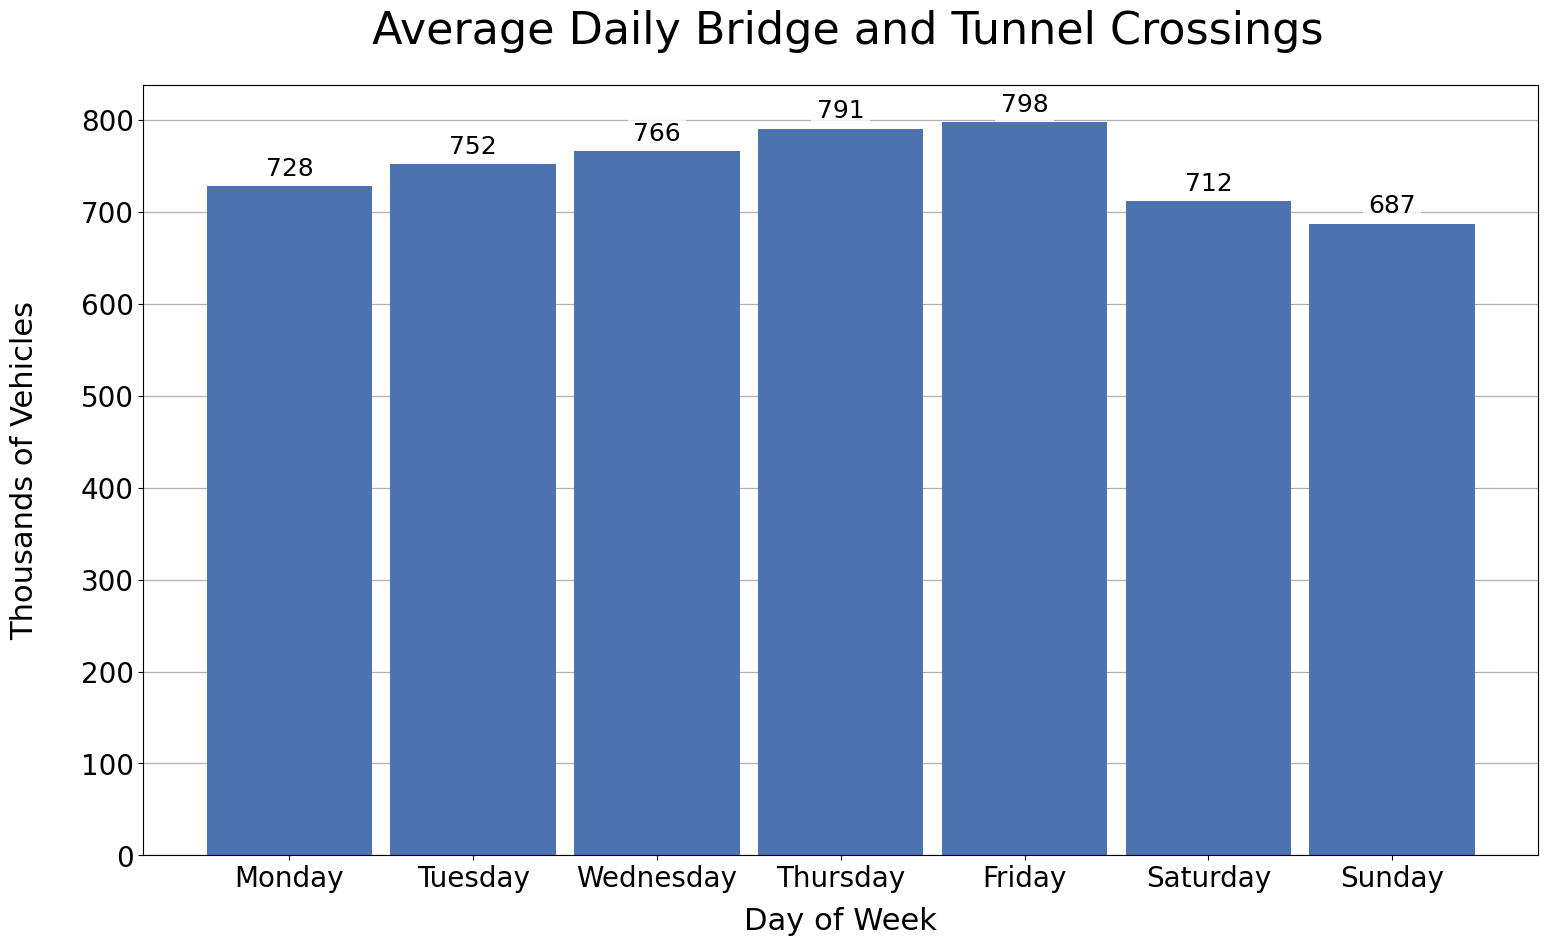

In [34]:
scale_factor = THOUSAND * total_weeks
daily_crossings = pd.DataFrame(
    exclude_2017.groupby(by=exclude_2017["datetime"].dt.dayofweek)["Sum Vehicles"].sum()
    / scale_factor
)
daily_crossings.index = daily_crossings.index.map(DAY_OF_WEEK_MAP)
day_labels = {
    "title": " Average Daily Bridge and Tunnel Crossings",
    "y_label": "Thousands of Vehicles",
    "x_label": "Day of Week",
}
viz.make_grouped_bar_chart(
    daily_crossings,
    **day_labels,
    legend=False,
    ylabel_rotation="vertical",
    bar_fontsize=18,
    bar_padding=4,
    colors=viz.CYCLE_COLORS,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "weekly_crossings.png"),
)

### Daily Variation

- Crossings are elevated from 2pm to 7pm (hours 14 to 19)
- Traffic levels reflect typical daily traffic patterns with an evening peak and early morning lull suggesting that the dataset does not over-index on high traffic locations that are excessively busy throughout the day. 

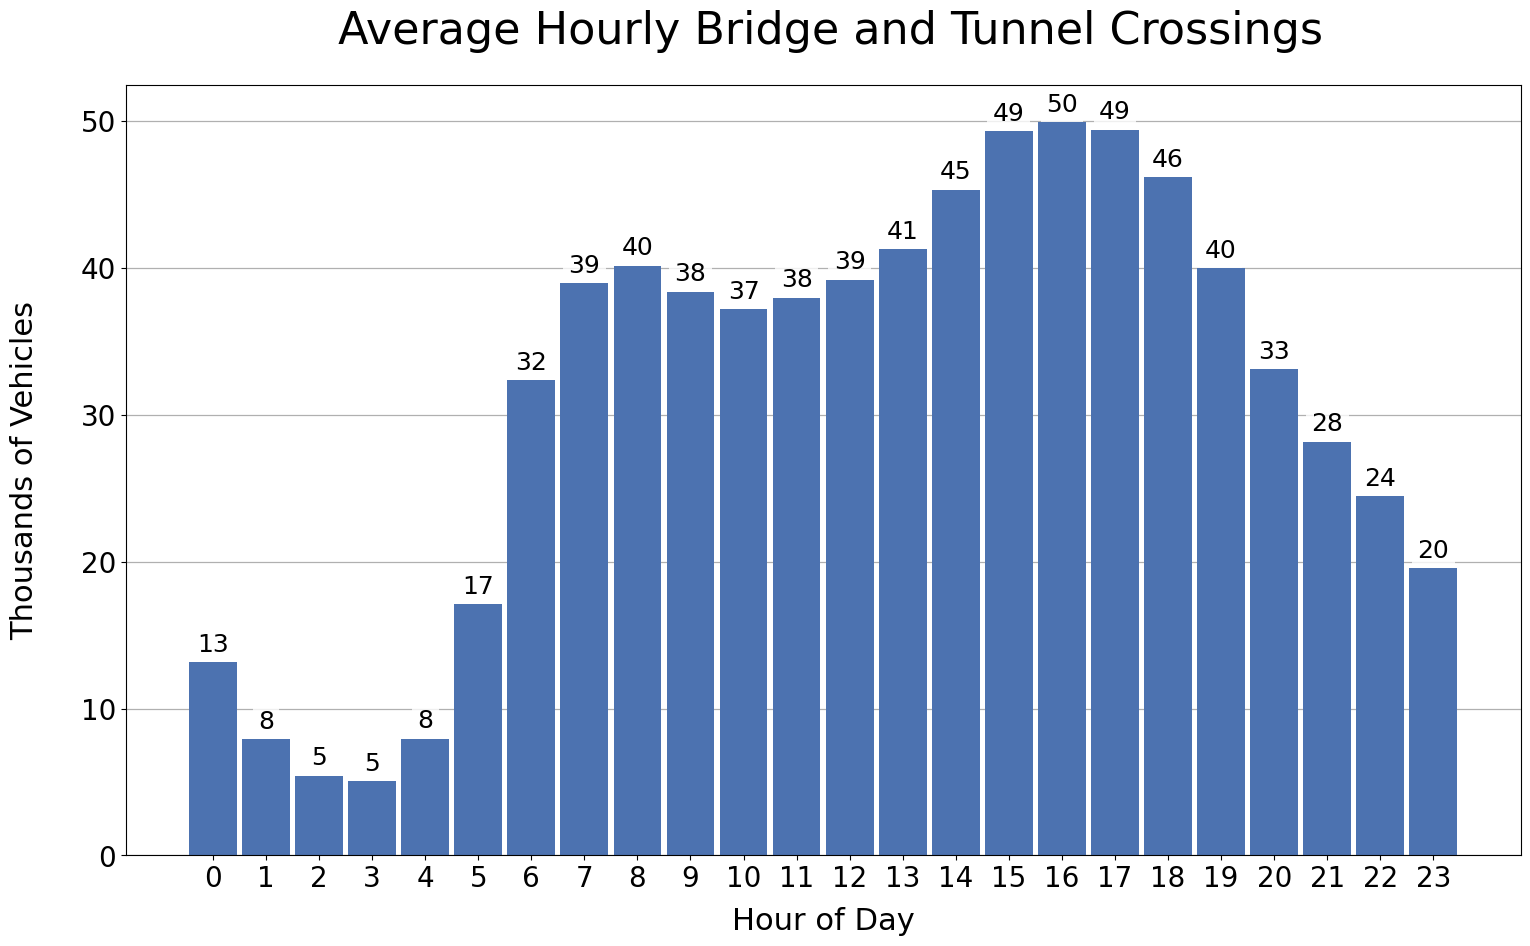

In [35]:
scale_factor = THOUSAND * total_days
hourly_crossings = pd.DataFrame(
    exclude_2017.groupby(by=exclude_2017["datetime"].dt.hour)["Sum Vehicles"].sum()
    / scale_factor
)
hour_labels = {
    "title": " Average Hourly Bridge and Tunnel Crossings",
    "y_label": "Thousands of Vehicles",
    "x_label": "Hour of Day",
}
groups = ["Hourly Crossings"]
viz.make_grouped_bar_chart(
    hourly_crossings,
    **hour_labels,
    legend=False,
    ylabel_rotation="vertical",
    bar_fontsize=18,
    bar_padding=4,
    colors=viz.CYCLE_COLORS,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "hourly_crossings.png"),
)

### 2D Weekly Variation

- Elevated crossings correspond to weekday rush hour periods
- Crossings are also elevated on weekend afternoons and earl evenings

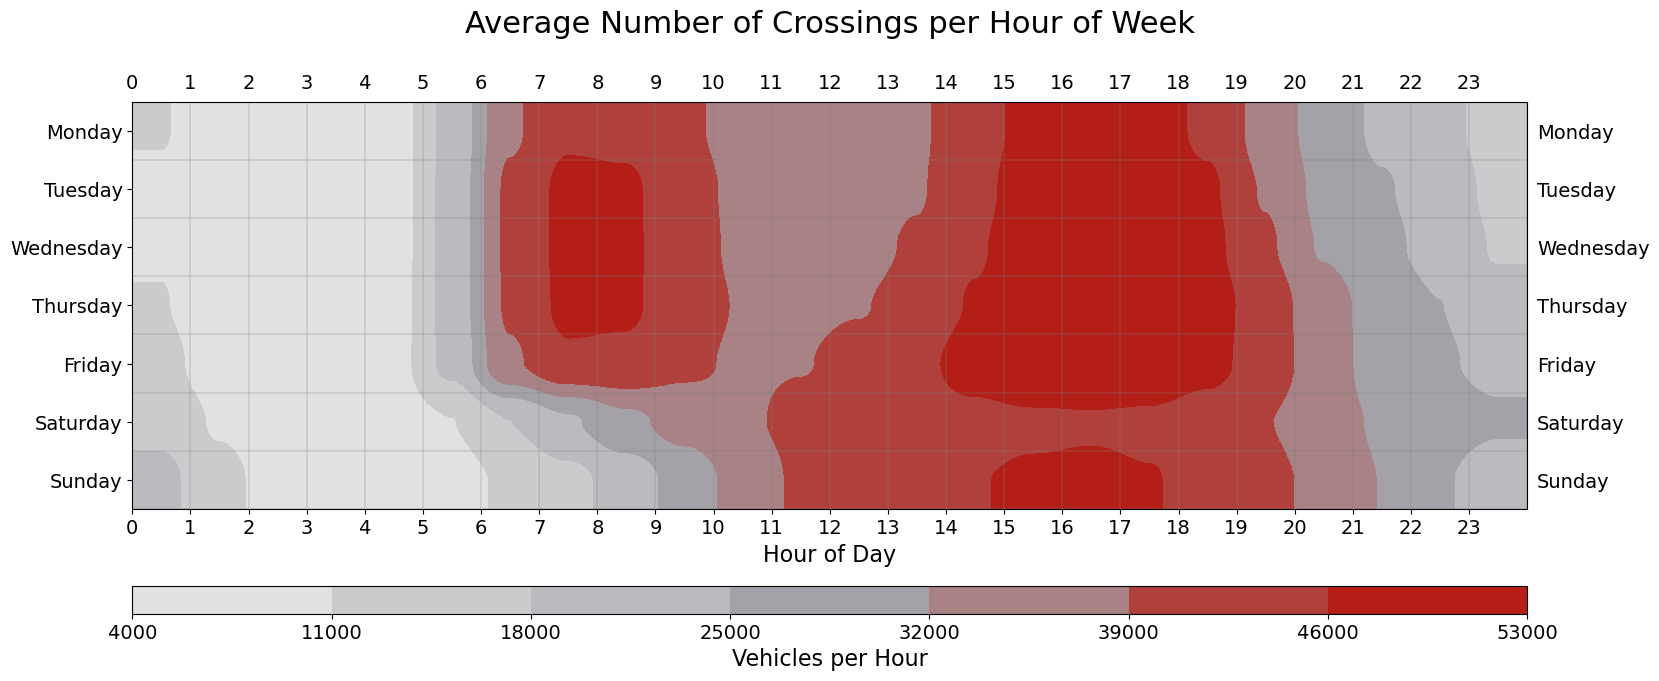

In [36]:
crossing_ct = src.utils.make_week_crosstab(
    exclude_2017,
    total_weeks,
    values=exclude_2017["Sum Vehicles"],
    aggfunc="sum",
    day_of_week_map=DAY_OF_WEEK_MAP,
)
ct_labels = src.utils.make_heatmap_labels(
    "Average Number of Crossings per Hour of Week", cbar_label="Vehicles per Hour"
)
viz.make_heat_map(
    crossing_ct,
    ct_labels,
    colors=viz.HEATMAP_COLORS,
    interpolation="hanning",
    cbar_format=lambda x: f"{round(x, -3):.0f}",
    save=os.path.join(IMG_DIR, "mta", "crossings_heatmap.png"),
)

## Preparing Hourly Traffic Index

In [37]:
traffic_index = (
    bt_data_clean.groupby(by="datetime")["Sum Vehicles"].sum().astype("float64")
)
ph.distribution_stats(traffic_index)

{'count': 120378,
 'min': 0.0,
 '1%': 3281.0,
 '5%': 4716.0,
 '25%': 15552.0,
 '50%': 33777.5,
 '75%': 44824.0,
 '95%': 54577.0,
 '99%': 59493.229999999996,
 'max': 126084.0,
 'median': 33777.5,
 'mean': 30852.127282393794,
 'median absolute deviation': 13612.0,
 'standard deviation': 16582.767484403863,
 'skew': -0.15777196610958064}

In [38]:
len(traffic_index[traffic_index == 0]), len(traffic_index[traffic_index < 100])

(15, 43)

There are several one-hour windows where there is zero traffic on the 7 MTA bridges and tunnels in NYC. These appear to correspond to time changes for daylight savings time or Hurricane Sandy (2012-10-30) where the MTA bridges and tunnels may have been closed or did not record crossings. 

In [39]:
traffic_index[traffic_index == 0]

datetime
2010-03-14 02:00:00    0.0
2012-03-11 02:00:00    0.0
2012-10-30 01:00:00    0.0
2012-10-30 02:00:00    0.0
2012-10-30 03:00:00    0.0
2012-10-30 04:00:00    0.0
2012-10-30 05:00:00    0.0
2012-10-30 06:00:00    0.0
2012-10-30 07:00:00    0.0
2012-10-30 08:00:00    0.0
2013-03-10 02:00:00    0.0
2014-03-09 02:00:00    0.0
2015-03-08 02:00:00    0.0
2016-03-13 02:00:00    0.0
2017-03-12 02:00:00    0.0
Name: Sum Vehicles, dtype: float64

In [40]:
traffic_index.quantile(0.0002), traffic_index.quantile(0.0005), traffic_index.quantile(
    0.001
)

(20.075400000000002, 452.26200000000006, 1598.6550000000002)

The dates for extremely low crossing numbers tend to correspond to major weather events.  2011-08-28 was Hurricane Irene. 2012-10-29 / 2012-10-30 was Hurricane Sandy. 2015-01-26/27 and 2016-01-23/24 were blizzards.

In [41]:
traffic_index[traffic_index.between(200, 1000)]

datetime
2010-12-27 03:00:00    771.0
2011-03-13 02:00:00    378.0
2011-08-28 01:00:00    625.0
2011-08-28 02:00:00    450.0
2011-08-28 03:00:00    318.0
2011-08-28 04:00:00    347.0
2011-08-28 05:00:00    445.0
2011-08-28 06:00:00    779.0
2011-08-28 07:00:00    887.0
2011-08-28 08:00:00    869.0
2011-08-28 09:00:00    970.0
2012-10-29 19:00:00    608.0
2012-10-29 20:00:00    462.0
2012-10-30 10:00:00    259.0
2012-10-30 11:00:00    733.0
2015-01-26 23:00:00    926.0
2015-01-27 00:00:00    609.0
2015-01-27 01:00:00    398.0
2015-01-27 02:00:00    397.0
2015-01-27 03:00:00    289.0
2015-01-27 04:00:00    355.0
2015-01-27 05:00:00    738.0
2016-01-23 17:00:00    902.0
2016-01-23 18:00:00    777.0
2016-01-23 19:00:00    789.0
2016-01-23 20:00:00    714.0
2016-01-23 21:00:00    620.0
2016-01-23 22:00:00    655.0
2016-01-23 23:00:00    626.0
2016-01-24 00:00:00    674.0
2016-01-24 01:00:00    413.0
2016-01-24 02:00:00    409.0
2016-01-24 03:00:00    335.0
2016-01-24 04:00:00    480.0
2016-

We create a traffic index where the minimum value of vehicle crossings per hour corresponds to the .05 percentile of hourly crossings. This is done to prevent any divide by zero errors.

In [42]:
estimated_min = traffic_index.quantile(0.0005)
traffic_index[traffic_index < estimated_min] = estimated_min

In [43]:
traffic_index.min(), traffic_index.max()

(452.26200000000006, 126084.0)

In [44]:
traffic_index = traffic_index.to_frame().reset_index()

In [45]:
traffic_index.to_pickle(PROCESSED_DATA_LOC)

# Conclusion

**The MTA Bridge and Tunnel Toll data appears to be a useful proxy for overall NYC traffic levels (excluding 2017 data which appears to have significant gaps).**
- It is a large hourly sample from connectors between all five boroughs
- The toll locations are spread throughout the city and do not over-index on a central business district
- The weekly and daily periodicity is inline with typical traffic patterns, reinforcing the idea that the data is a useful proxy for citywide traffic levels